# Python Pythônico

## Objetivo

Assim como línguas possuem construções específicas que fazem uma pessoa soar um falante nativa (ex. gírias, sotaques, ditados populares), cada liguagem de programação também possui sua forma idiomática. Um exemplo é a linguagem C++. É possível escrever um código inteiramente em C e compilá-lo como C++. Isso não quer dizer que você sabe programar em C++. Um programador C++ experiente será capaz de identificar facilmente uma falta de fluência na linguagem ao ler esse código. 

Ainda na analogia das línguas, programar da mesma forma em todas as linguagens é como se você traduzisse uma frase palavra por palavra de uma língua para outra. Talvez ainda seja possível compreender o significado geral da frase (o código pode funcionar), mas um falante nativo não terá dúvidas de que você não é proficiente nessa língua. 

O objetivo deste notebook é trabalhar alguns conceitos específicos da linguagem Python a fim de desenvolvermos mais fluência e assim escrevermos código cada vez mais "Pythônico". 

## O que eu devo fazer?

Siga a leitura das células abaixo e tente fazer os exercícios. Você não precisa criar células adicionais. Basta completar as células de código com o que falta e as células de texto com as respostas para as perguntas que forem feitas. 

Algumas células possuem código de teste. Não modifique essa parte do código (ele está devidamente identificado com um comentário). Nesses casos, você deve escrever o código que faça os testes passarem, ou seja, a célula deve executar sem erros.

In [2]:
# Imports
import sys
import string
import random
import cProfile
import matplotlib.pyplot as plt

## Trabalhando com Coleções

### Iterando sobre o índice e elemento ao mesmo tempo

Para aquecer, vamos praticar o uso da função `enumerate`. 

**Exercício:** Escreva um código que imprime o índice e o seu respectivo elemento em uma lista utilizando o `enumerate`. Para facilitar, veja a documentação da função:

In [3]:
help(enumerate)  # Implemente sua solução NA PRÓXIMA CÉLULA

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable, start=0)
 |  
 |  Return an enumerate object.
 |  
 |    iterable
 |      an object supporting iteration
 |  
 |  The enumerate object yields pairs containing a count (from start, which
 |  defaults to zero) and a value yielded by the iterable argument.
 |  
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [4]:
# Implemente aqui a sua solução
def my_enum(list1):
    for item, i in enumerate(list1):
        print(item, i)
my_enum(['a', 'b', 'c'])

0 a
1 b
2 c


### Comprehensions

Comprehensions são uma maneira alternativa para criar de coleções em Python. Pesquise sobre *list comprehension*, *set comprehension* e *dictionary comprehension*. Uma possível fonte é: https://python-3-patterns-idioms-test.readthedocs.io/en/latest/Comprehensions.html

**Exercício:** Escreva na célula abaixo um código usando comprehensions que gere (um por linha):

1. Uma lista contendo todos os números pares entre 2 e 1000;
1. Um set contendo todos os caracteres da string `'the quick brown fox jumps over the lazy dog'` (curiosidade, essa frase é um [pangrama](https://pt.wikipedia.org/wiki/Pangrama));
1. Um dicionário cujas chaves são quadrados perfeitos e os valores são suas respectivas raízes. Os valores devem ser todos os números entre 1 e 1000.

In [5]:
# Escreva sua solução aqui

# Solução 1
pares = [num for num in range(2, 1001) if num % 2 == 0]  # Preencha com a solução
# Solução 2
caracteres = {c for c in 'the quick brown fox jumps over the lazy dog'}  # Preencha com a solução
# Solução 3
quadrados = {num**2: num for num in range(1, 1001)}  # Preencha com a solução

# NÃO MODIFIQUE AS LINHAS ABAIXO
# Teste da lista de pares
assert len(pares) == 500
for i in range(2, 1001, 2):
    assert i in pares
# Teste do set de caracteres
assert len(caracteres) == 27
for c in string.ascii_lowercase + ' ':
    assert c in caracteres
# Teste do dicionário de quadrados perfeitos
assert len(quadrados) == 1000
for i in range(1, 1001):
    assert i**2 in quadrados
    assert quadrados[i**2] == i

### Usando comprehensions para filtrar elementos

Comprehensions também aceitam condições. Essas condições podem ser usadas para decidir se um elemento entra ou não no resultado final. Esse efeito é obtido ao se adicionar um `if` no final da comprehension de acordo com o seguinte formato:

```python
resultado = [variavel for variavel in colecao if condicao(variavel)]
```

Note que a `variavel` está disponível para a `condicao`.

**Exercício:** Utilize list comprehension para gerar uma lista contendo somente os números pares que estão na lista `a`.

**Observação:** O Python também possui uma função `filter` que pode ser utilizada para obter um efeito semelhante.

In [6]:
a = [i for i in range(0, 100, 3)]
pares_em_a = [num for num in a if num % 2 == 0]  # Faça aqui a sua list comprehension


# NÃO MODIFIQUE AS LINHAS ABAIXO
# Teste da lista de números pares em a
assert len(pares_em_a) == 17
for i in a:
    if i % 2 == 0:
        assert i in pares_em_a
    else:
        assert i not in pares_em_a

Aproveitando que estamos falando de `if`'s, vamos ver como fazer expressões condicionais. Para isso, leia esta seção: https://realpython.com/python-conditional-statements/#conditional-expressions-pythons-ternary-operator

**Exercício:** Escreva um código de uma linha para atribuir um valor a uma nova variável `b`. Esse valor depende do valor aleatório de `a`: se `a` é par, `b` recebe o mesmo valor de `a`; caso contrário, `b` recebe `-1`.

In [7]:
a = random.randint(1, 10000)
b = a if a % 2 == 0 else -1  # Substitua o None pela expressão condicional


# NÃO MODIFIQUE AS LINHAS ABAIXO
# Teste do valor de b
if a % 2 == 0:
    assert b == a
else:
    assert b == -1

**Exercício:** Vamos combinar os dois conceitos anteriores. Crie uma lista que contém somente os números da lista `a` que são múltiplos de 5. Se o número for ímpar, ele deve ser substituído por -1. Utilize list comprehension.

<div class="alert alert-block alert-success">
Como você vai perceber neste exercício, list comprehensions se tornam incompreensíveis rapidamente (pun intended). Aqui só queremos usar comprehensions para fins de estudo, mas se as condições começam a ficar muito complexas pode ser melhor utilizar o bom e velho <code>append</code>. Lembre-se que a legibilidade do código é mais importante do que usar recursos avançados da linguagem.
</div>

In [1]:
a = [i for i in range(0, 1000, 3)]
filtrado = [num if num % 2 == 0 else -1 for num in a if num % 5 == 0]  # Substitua pelo seu código
print(filtrado)
# NÃO MODIFIQUE AS LINHAS ABAIXO
assert len(filtrado) == 67
for i in a:
    if i % 5 == 0 and i % 2 == 0:
        assert i in filtrado
    else:
        assert i not in filtrado
assert sum(i == -1 for i in filtrado) == 33

[0, -1, 30, -1, 60, -1, 90, -1, 120, -1, 150, -1, 180, -1, 210, -1, 240, -1, 270, -1, 300, -1, 330, -1, 360, -1, 390, -1, 420, -1, 450, -1, 480, -1, 510, -1, 540, -1, 570, -1, 600, -1, 630, -1, 660, -1, 690, -1, 720, -1, 750, -1, 780, -1, 810, -1, 840, -1, 870, -1, 900, -1, 930, -1, 960, -1, 990]


### Usando comprehensions para aplicar uma função a todos os elementos

Podemos utilizar comprehensions para criar novas coleções contendo o resultado de uma função ou operação aplicada a todos os elementos da coleção original.

**Observação:** O Python possui uma função `map` que pode ser utilizada para obter um efeito semelhante.

In [9]:
# Exemplo
def quadrado(n):
    return n**2


print([quadrado(i) for i in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


**Exercício:** Escreva uma list comprehension que retorna uma lista contendo os tamanhos das strings da lista original.

In [10]:
strings = ['a' * i for i in range(100)]


tamanhos = [len(s) for s in strings]  # Substitua pela sua list comprehension


# NÃO MODIFIQUE O CÓDIGO ABAIXO
for i, string in enumerate(strings):
    assert len(string) == tamanhos[i]

**Exercício:** Utilize a função `map` para implementar a mesma operação da célula acima.

In [11]:
help(map)

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [12]:
def calc_len(elem):
    return len(elem)
strings = ['a' * i for i in range(100)]


tamanhos2 = list(map(calc_len, strings))  # Substitua essa linha pela sua chamada da função map

# NÃO MODIFIQUE O CÓDIGO ABAIXO
for i, string in enumerate(strings):
    assert len(string) == tamanhos2[i]

## Generators

Considere as duas implementações de Fibonacci abaixo:

In [13]:
def fibonacci1(n):
    prev = 1
    curr = 1
    yield 1
    for _ in range(n-1):
        prev, curr = curr, curr + prev
        yield curr

        
def fibonacci2(n):
    result = [1]
    prev = 1
    curr = 1
    for _ in range(n-1):
        prev, curr = curr, curr + prev
        result.append(curr)
    return result

# Testando as funções
for i in fibonacci1(6):
    print(i)

for i in fibonacci2(6):
    print(i)

1
2
3
5
8
13
1
2
3
5
8
13


**Exercício:** Na célula abaixo, imprima o resultado da chamada da função `type` para `fibonacci1(6)` e `fibonacci2(6)`. 

In [14]:
# Implemente aqui os dois prints
print(type(fibonacci1(1)))
print(type(fibonacci2(1)))

<class 'generator'>
<class 'list'>


**Exercício:** Vamos analisar as duas versões. Utilize a função `sys.getsizeof` para verificar a quantidade de memória utilizada por `fibonacci1(i)` e `fibonacci2(i)`, para `i` variando entre 1 e 1000. Gere um gráfico com o resultado (`matplotlib.pyplot` já está importado como `plt`).

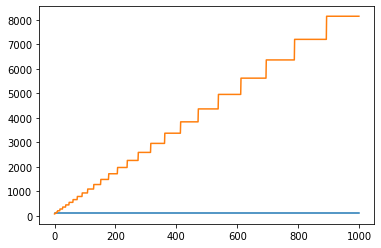

In [15]:
# Gere o gráfico aqui
seq1 = []
seq2 = []
for i in range(1000):
    seq1.append(sys.getsizeof(fibonacci1(i)))

for i in range(1000):
    seq2.append(sys.getsizeof(fibonacci2(i)))

plt.plot(seq1)
plt.plot(seq2)

**Exercício:** Utilize a função `cProfle.run` para executar o código `[f for f in fibonacci1(500000)]` e `[f for f in fibonacci2(500000)]`. Um dos códigos deve ser consideravelmente mais rápido do que o outro.

In [23]:
# Escreva seu código aqui
cProfile.run('[f for f in fibonacci1(300000)]')
cProfile.run('[f for f in fibonacci2(300000)]')

         300005 function calls in 6.160 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   300001    5.888    0.000    5.888    0.000 <ipython-input-13-2b0beccdc3fc>:1(fibonacci1)
        1    0.083    0.083    5.971    5.971 <string>:1(<listcomp>)
        1    0.189    0.189    6.160    6.160 <string>:1(<module>)
        1    0.000    0.000    6.160    6.160 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


         300004 function calls in 2.474 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.249    2.249    2.272    2.272 <ipython-input-13-2b0beccdc3fc>:10(fibonacci2)
        1    0.026    0.026    0.026    0.026 <string>:1(<listcomp>)
        1    0.176    0.176    2.474    2.474 <string>:1(<module>)
        1    0.000    0.000    2.474    2.474 {built-in method bui

**Exercício:** Pesquise a diferença entre os dois tipos (de `fibonacci1` e `fibonacci2`) e escreva um parágrafo curto contando o que descobriu. Comente sobre as diferenças observadas nas células acima. Comente brevemente sobre as vantagens e desvantagens de cada solução.

Uma boa referência é: https://realpython.com/introduction-to-python-generators/

**Resposta:**

Percebe-se que o uso do yield comparado ao uso de uma lista é mais leve em termos de memória e mais lento em termos de tempo, sendo perceptível com o aumento do n (número de elementos para cálculo da sequência).

O yield é mais lento pois o seu uso implica em múltiplas chamadas da função, resultando em uma execução mais lenta do que o uso do return, o qual realiza apenas uma execução.

Porém o seu uso é mais leve pois não armazena valores intermediários, fato que ocorre na função que utiliza return, armazenando todos os valores em uma lista.

## Iterators

*Iterators* são comumente confundidos com generators, pois o seu uso é muitas vezes parecido. Já vimos o que são generators na seção acima. Nesta seção vamos discutir brevemente o que são *iterators*.

*Iterators* são objetos que implementam o protocolo de um iterador (ok, não ajudou muito). Em outras palavras, são objetos que implementam os métodos mágicos `__iter__()` e `__next__()`.

<div class="alert alert-block alert-success">
<b>Uma palavra sobre métodos mágicos/especiais (ou dunder methods):</b> Você já deve ter visto métodos que começam e terminam com dois underscores em Python. Pela preguiça de falar toda vez <i>"underscore, underscore método underscore underscore"</i>, a comunidade Python passou a chamar esse duplo underscore no começo e fim do método de <i>dunder</i>. Talvez o exemplo mais famoso seja o <code>__init__()</code> (<it>dunder init</it>). Em geral, esses métodos não são chamados explicitamente. O próprio Python os chama quando necessário. Por exemplo, quando vamos comparar um objeto <code>a</code> com um objeto <code>b</code> usando o sinal de menor (<code>a < b</code>) o Python chama o método <code>a.__lt__(b)</code>. <a href="https://dbader.org/blog/python-dunder-methods">[Para saber mais]</a>.
</div>
    
Você já se perguntou como o `for` do Python funciona? Considere o seguinte código:

```python
lista = [1, 2, 3, 4, 5]
for elemento in lista:
    print(elemento)
```

Ele é traduzido para algo parecido com:

```python
lista = [1, 2, 3, 4, 5]
iterator = iter(lista)
while True:
    try:
        elemento = next(iterator)
    except StopIteration:
        break
    print(elemento)
```

Mas vamos com calma. Vamos entender o que está acontecendo nas células abaixo.

Para saber mais: 
- https://realpython.com/python-for-loop/
- https://anandology.com/python-practice-book/iterators.html


In [17]:
# Começamos declarando a lista
lista = [1, 2, 3, 4, 5]

# Vamos ver o que esse objeto pode fazer
help(lista)

Help on list object:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate sign

Esse objeto possui diversos métodos (mas já esperávamos isso, pois é uma lista e sabemos que é possível fazer muitas coisas com listas). Um deles é o `__iter__()`. Quando chamamos a função `iter()` passando a `lista` como argumento, o Python vai chamar esse método mágico.

In [18]:
# Equivalente a iterator = lista.__iter__()
iterator = iter(lista)

# Vamos ver o que está guardado na variável iterator
print(iterator)
help(iterator)

Help on list_iterator object:

class list_iterator(object)
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __length_hint__(...)
 |      Private method returning an estimate of len(list(it)).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  __setstate__(...)
 |      Set state information for unpickling.



Esse objeto possui bem menos métodos, mas note que ele possui um `__iter__()` e um `__next__()`. Isso significa que ele é um iterator, pois implementa o protocolo de um iterador. Quando chamamos a função `next()` passando o iterador o Python chama (adivinhe...) o método `__next__()`.

In [19]:
print(next(iterator))  # Imprime 1
print(next(iterator))  # Imprime 2
print(next(iterator))  # Imprime 3
print(next(iterator))  # Imprime 4
print(next(iterator))  # Imprime 5

1
2
3
4
5


Agora acabaram-se os elementos da lista. Vamos ver o que acontece quando chamamos o `next()` mais uma vez.

In [20]:
next(iterator)

StopIteration: 

Ele lança uma exceção do tipo `StopIteration`. Por isso precisamos do `try`/`except` no exemplo acima.

**Exercício:** Agora vamos implementar um iterador para treinar. Implemente um iterador que pula de dois em dois elementos de uma lista.

In [9]:
class SkipIterator:
    def __init__(self, lista):
        self.lista = lista
        self.i = 0
        # Adicione os atributos que quiser aqui...

    
    def __iter__(self):
        # Você não precisa modificar este método
        return self
    
    def __next__(self):
        try:
            elemento = self.lista[self.i]
            self.i = self.i + 2
        except:
            raise StopIteration()
        return elemento
        # Implemente aqui a funcionalidade de pular de 2 em 2


# lista = list(range(100))
# iterator = SkipIterator(lista)
# for i in iterator:
#     print(i)

# NÃO MODIFIQUE AS LINHAS ABAIXO
# Teste do SkipIterator
lista = list(range(100))
iterator = SkipIterator(lista)
resultado = [i for i in iterator]
esperado = lista[::2]
assert resultado == esperado


## `*args` e `**kwargs`

Você já se perguntou como as funções que recebem quantidades arbitrárias de argumentos funcionam? Considere, por exemplo, a função `max()`. Ela pode receber dois, três, ou até mais argumentos e retorna o maior de todos:

```python
print(max(1, 2))  # imprime 2
print(max(1, 2, 3))  # imprime 3
print(max(1, 2, 3, 4))  # imprime 4
print(max(1, 2, 3, 4, 5))  # imprime 5
```

Vamos ver a documentação da função `max`:

In [10]:
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



Note que o terceiro argumento da segunda versão da função `max` é `*args`. O uso do `*` indica para o Python que todos os argumentos a partir desse ponto (que não sejam keyword arguments - mais sobre isso depois) serão recebidos como uma tupla no argumento `args`. Para entender melhor vamos analisar o exemplo a seguir:

In [11]:
def my_avg(e1, e2,  args):
    print(type(args))
    

my_avg(1, 2, 3, 4, 5, 6)

<class 'tuple'>


**Exercício:** Vamos implementar a função `my_avg` que recebe **2 ou mais** argumentos e devolve a média aritmética entre eles.

In [16]:
def my_avg(e1, e2, *args):
    avg = (e1 + e2 + sum(args)) / (2 + len(args))
    return avg  # Implemente a média aqui


# NÃO MODIFIQUE AS LINHAS ABAIXO
assert my_avg(1, 3) == 2
assert my_avg(1, 2, 3) == 2
assert my_avg(1, 2, 3, 4, 5) == 3

Considere agora a seguinte implementação alternativa da média:

In [17]:
def my_avg2(a=0, b=0, c=0):
    return (a + b + c) / 3


print(my_avg2(b=3))
print(my_avg2(6))
print(my_avg2(2, 3, 4))

1.0
2.0
3.0


Podemos perceber que, ao utilizar argumentos padrão, não é necessário passar todos os argumentos. Isso também nos permite escolher algum argumento específico para ser passado e utilizar os valores padrão para os outros (ex: `my_avg(b=3)`). 

Agora considere o caso em que temos uma [lista grande de argumentos opcionais](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D). Nesses casos pode ser interessante utilizar o `**kwargs`. O uso do `**` indica para o Python que o `kwargs` será um dicionário contendo os argumentos recebidos pela função que foram definidos com um nome. Exemplo:

In [ ]:
def test_kwargs(**kwargs):
    print(type(kwargs))
    print(kwargs)


test_kwargs(a=1, b=2, c=3)

Também funciona no sentido contrário:

In [18]:
def test_arg_passing(a, b, c, d, e, f):
    return a + b + c + d + e + f


argumentos_como_tupla = (1, 2, 3)
argumentos_como_dicionario = {'d': 4, 'e': 5, 'f': 6}
print(test_arg_passing(*argumentos_como_tupla, **argumentos_como_dicionario))

21


Podemos utilizar essas ideias para, por exemplo, implementar esta elegante intersecção de dicionários:

In [19]:
a = dict(zip(range(10), range(10)))
b = dict(zip(range(5,15), range(15,25)))
c = {**a, **b}
print(a)
print(b)
print(c)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
{5: 15, 6: 16, 7: 17, 8: 18, 9: 19, 10: 20, 11: 21, 12: 22, 13: 23, 14: 24}
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 15, 6: 16, 7: 17, 8: 18, 9: 19, 10: 20, 11: 21, 12: 22, 13: 23, 14: 24}


**Exercício:** Explique brevemente o que acontece na terceira linha da célula acima.

**Resposta:**

Quando o operador ** é usado, estamos atribuindo valores à chaves de dicionários, quando pasamos dois "kwarg" para um dicionário, as chaves que estão repetidas, terão o valor do segundo "kwarg"

Para saber mais: https://realpython.com/python-kwargs-and-args/

## Desempacotamento de tuplas

Talvez você já tenha utilizado e/ou criado funções que retornam mais do que um elemento:

In [20]:
def return_multiple():
    return 1, 2, 3


a, b, c = return_multiple()

O que acontece nesse caso?

Em Python, quando declaramos valores separados por vírgula estamos, na verdade, criando uma tupla (não precisamos utilizar os parênteses se não houver ambiguidade):

In [21]:
tupla_com_virgulas = 1, 2, 3, 4, 5, 6

print(type(tupla_com_virgulas))
print(tupla_com_virgulas)

<class 'tuple'>
(1, 2, 3, 4, 5, 6)


Ou seja, quando retornamos valores separados por vírgulas, estamos na verdade retornando um único valor: uma tupla contendo todos os valores retornados.

Isso é conhecido como empacotamento/desempacotamento de tuplas ([*tuple unpacking*](https://realpython.com/python-lists-tuples/#tuple-assignment-packing-and-unpacking)). Basicamente, você pode atribuir os valores de uma tupla a variáveis distintas:

In [22]:
a = (1, 2, 3)
c, d, e = a
print(a, c, d, e)

(1, 2, 3) 1 2 3


Um resultado disso é que podemos implementar uma [troca de variáveis](https://en.wikipedia.org/wiki/Assignment_(computer_science)#Parallel_assignment) bastante elegante:

In [23]:
a = 1
b = 2
print('Antes', a, b)


# Troca de variáveis em uma linha
a, b = b, a


print('Depois', a, b)

Antes 1 2
Depois 2 1


Podemos combinar as ideias acima:

In [24]:
f = (2, 3, 4, 5, 6, 7, 8)
a, b, *c, d, e = 1, *f, 9
print(a, b, *c, d, e)

1 2 3 4 5 6 7 8 9


In [36]:
b = (1, 2, 3)
*a, c = b
print(a)

[1, 2]


**Exercício:** Explique brevemente o que está acontecendo no código da célula acima.

**Resposta:**

Quando temos uma atribuição no formato: variável, variável = *variável. Os elementos à esquerda, receberão os elementos da variável à direita desempacotada. Quando temos algo no formato: *a, b = *c. A variável a receberá todos os valores de c, menos o último, que irá para b.

No caso acima, desempacotamos a variável f e passamos parte dela para b, parte para c e parte para d.

**Exercício:** Escreva um código para imprimir os elementos de uma lista "de fora para dentro", ou seja, em cada linha devem ser impressos o primeiro e o último elemento, depois o segundo e o penúltimo, e assim por diante. Exemplo:

A lista `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]` deve ser apresentada da seguinte maneira:

```
0 9
1 8
2 7
3 6
4 5
```

Você pode admitir que o número de elementos da lista é par. 

**Observação:** a ideia de empacotamento/desempacotamento de tuplas também funciona com listas.

**Condições:** seu código **não pode** utilizar índices, nem fatiamento e deve ser escrito inteiramente dentro do `while` abaixo:

In [39]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


while numbers:
    left, *numbers, right = numbers
    print(left, right)

0 9
1 8
2 7
3 6
4 5


# Outros detalhes sobre Python

## Valores de argumento padrão

O código a seguir possui um bug:

In [57]:
def append_range(start, end, step=1, to=[]):
    for i in range(start, end, step):
        to.append(i)
    return to

for i in range(7):
    r1 = append_range(0, i)
    r2 = append_range(0, i, to=[])
    print(r1, r2)

[] []
[0] [0]
[0, 0, 1] [0, 1]
[0, 0, 1, 0, 1, 2] [0, 1, 2]
[0, 0, 1, 0, 1, 2, 0, 1, 2, 3] [0, 1, 2, 3]
[0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4] [0, 1, 2, 3, 4]
[0, 0, 1, 0, 1, 2, 0, 1, 2, 3, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5] [0, 1, 2, 3, 4, 5]


Os valores de `r1` e `r2` deveriam ser sempre iguais. Por que não são? 

Se não souber, leia a primeira seção [deste artigo](https://docs.python-guide.org/writing/gotchas/#mutable-default-arguments).

**Exercício:** corrija o bug **modificando apenas a função `append_range`**.

In [58]:
# Corrija o bug modificando somente a função abaixo
def append_range(start, end, step=1, to=[]):
    for i in range(start, end, step):
        to.append(i)
    tmp = to
    to = None
    return tmp

for i in range(7):
    r1 = append_range(0, i)
    r2 = append_range(0, i, to=[])
    assert r1 == r2

AssertionError: 

### Variáveis globais

Ambas as funções usam "variáveis globais", mas uma funciona e a outra não.

In [ ]:
variavel_global = 10

def func1(n):
    for i in range(n):
        print(variavel_global)

def func2(n):
    for i in range(n):
        variavel_global += i
        print(variavel_global)

func1(10)
func2(10)

**Exercício:** Explique por que uma das funções acima funciona e a outra não.
    
**Resposta:**

[Escreva sua resposta aqui...]

### VARIAVEL is None

Talvez você já tenha escutado alguém falando que é melhor verificar se um objeto é `None` utilizando `is` ao invés de `==`. Vamos discutir rapidamente o porquê disso. Considere o seguinte exemplo:

In [ ]:
class MyClass:
    def __eq__(self, other):
        return True


var = MyClass()
print(var == None)
print(var is None)

**Exercício:** Pesquise sobre a diferença entre `==` e `is` em Python. Explique brevemente por que devemos utilizar `is None` ao invés de `== None` para verificar se uma variável guarda o valor `None`.

Possíveis referências:
- https://dbader.org/blog/difference-between-is-and-equals-in-python
- https://www.alura.com.br/artigos/qual-a-diferenca-entre-e-is-no-python

**Resposta:**

[Escreva sua resposta aqui...]

# Outras coisas interessantes para estudar

Nesta atividade espero ter apresentado algumas maneiras de escrever código "mais Pythônico". Entretanto, ainda existem **muitas** outras coisas que não conseguimos cobrir. Caso tenha interesse, alguns possíveis tópicos para estudo são:

- Zen of Python: execute o código `import this`
- [funções aninhadas](https://realpython.com/inner-functions-what-are-they-good-for/)
- [mypy](http://mypy-lang.org/)
- [type hints](https://docs.python.org/3/library/typing.html)
- [underscores, dunders, name mangling](https://dbader.org/blog/meaning-of-underscores-in-python)
- [decorators](https://realpython.com/primer-on-python-decorators/)
- [PEP8](https://www.python.org/dev/peps/pep-0008/)
- [variáveis são passadas por valor ou referência?](https://realpython.com/python-variables/)
- [formatação de strings](https://realpython.com/python-string-formatting/)
- [módulo `collections`](https://towardsdatascience.com/pythons-collections-module-high-performance-container-data-types-cb4187afb5fc)